In [71]:
import pandas as pd
import os

# Check if file exists
file_path = 'En SubjectLines.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("✅ Success! File loaded.")
    print(df.head()) # Shows the first 5 rows
else:
    print("❌ File not found. Check the spelling!")
    

✅ Success! File loaded.
                                             subject  sendings     opens  \
0  Thank you{% if contact.1 == '{{ contact.1 }}' ...  64477108  17972995   
1  Your exclusive Photo Product offer awaits{% if...  43081180  12210189   
2  Your exclusive Photo Product offer awaits{% if...  41786220  11060178   
3         Huge sale on Acrylic Prints  – from £7.78!  27661060   7716586   
4  Sunday Savings! Canvases and Home Decorations ...  23897214   6232485   

   open_rate  
0   0.278750  
1   0.283423  
2   0.264685  
3   0.278969  
4   0.260804  


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5889 entries, 0 to 5888
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    5888 non-null   object 
 1   sendings   5889 non-null   int64  
 2   opens      5889 non-null   int64  
 3   open_rate  5889 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 184.2+ KB


In [73]:
df = df.dropna()

In [74]:
df.columns

Index(['subject', 'sendings', 'opens', 'open_rate'], dtype='object')

In [75]:
# Count rows before filtering
rows_before = len(df)

# Remove rows with sendings < 1000
df = df[df['sendings'] >= 1000]

# Count rows after filtering
rows_after = len(df)

# Report
print(f"Rows removed (sendings < 1000): {rows_before - rows_after}")
print(f"Remaining rows: {rows_after}")


Rows removed (sendings < 1000): 1990
Remaining rows: 3898


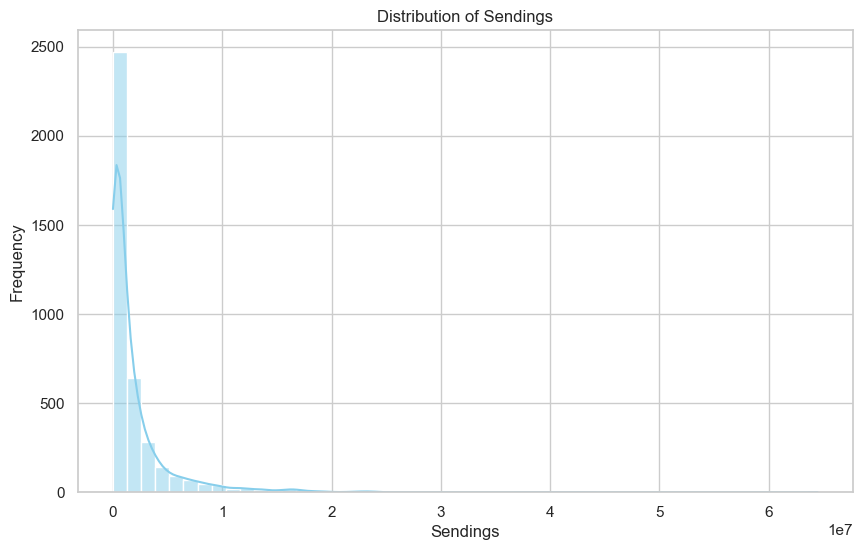

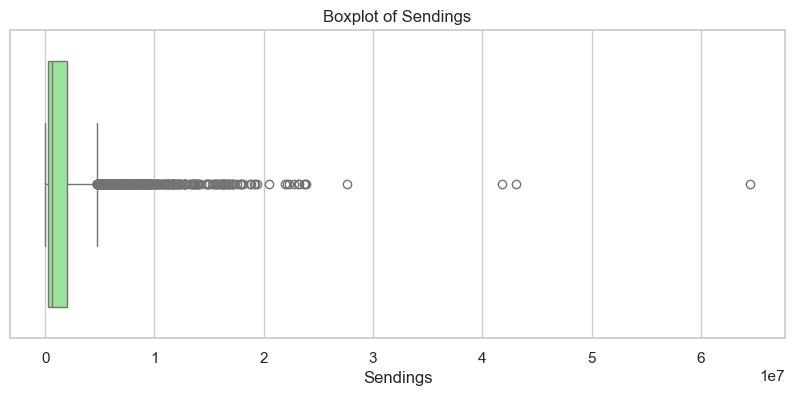

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded
# df = pd.read_csv("OR.csv")  # if needed

# Set style
sns.set(style="whitegrid")

# 1️⃣ Histogram + KDE (distribution)
plt.figure(figsize=(10,6))
sns.histplot(df["sendings"], kde=True, bins=50, color="skyblue")
plt.title("Distribution of Sendings")
plt.xlabel("Sendings")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Boxplot (to detect outliers)
plt.figure(figsize=(10,4))
sns.boxplot(x=df["sendings"], color="lightgreen")
plt.title("Boxplot of Sendings")
plt.xlabel("Sendings")
plt.show()


In [77]:
import re
import html
import unicodedata

def normalize_subject(subject: str) -> str:
    if not isinstance(subject, str):
        return ""

    # 1. Remove Jinja / templating logic
    subject = re.sub(r'\{[%{].*?[%}]\}', '', subject)

    # 2. Decode HTML entities (emoji, symbols)
    subject = html.unescape(subject)

    # 3. Unicode normalize (quotes, accents consistency)
    subject = unicodedata.normalize("NFKC", subject)

    # 4. Lowercase
    subject = subject.lower()

    # 5. Remove numbers
    subject = re.sub(r"\d+", " ", subject)

    # 6. Remove punctuation (keep letters only)
    subject = re.sub(r"[^\w\s]", " ", subject)

    # 7. Remove leftover underscores (from \w)
    subject = re.sub(r"_+", " ", subject)

    # 8. Normalize whitespace
    subject = re.sub(r"\s+", " ", subject).strip()

    return subject




In [78]:
# Create normalized subject
df['subject_norm'] = df['subject'].apply(normalize_subject)

# Find duplicated normalized subjects
dups = df[df.duplicated('subject_norm', keep=False)] \
    .sort_values('subject_norm')

# Count how many rows are part of identical subjects
num_identical_rows = len(dups)

# Count how many unique subject groups are duplicated
num_identical_groups = dups['subject_norm'].nunique()

print(f"Rows with identical subjects: {num_identical_rows}")
print(f"Distinct identical subject groups: {num_identical_groups}")

# Output the duplicated rows
dups

Rows with identical subjects: 1860
Distinct identical subject groups: 753


,subject,sendings,opens,open_rate,subject_norm
3312,{% if contact.1 == '' %}{% if contact.1 == tru...,106690,36108,0.338438,a a a a gift from our ceo free shipping just f...
1633,{% if contact.1 == '' %}{% if contact.1 == tru...,967537,410081,0.423840,a a a a gift from our ceo free shipping just f...
1579,{% if contact.1 == '' %}{% if contact.1 == tru...,1043496,332184,0.318338,a a a a gift from our ceo free shipping just f...
889,&#x1f385; A Christmas in July Mystery discount...,2258347,661822,0.293056,a christmas in july mystery discount ready rea...
190,&#x1f385; A Christmas in July Mystery discount...,8034812,2305163,0.286897,a christmas in july mystery discount ready rea...
...,...,...,...,...,...
384,"{% if contact.1 == true %}{{ contact.1 }}, you...",4885039,1398084,0.286197,youryour up to on canvas collages is about to ...
189,{% if contact.1 == '' %}{% if contact.1 == tru...,8048959,2205081,0.273959,youryour youryour parents deserve this up to o...
2212,{% if contact.1 == '' %}{% if contact.1 == tru...,473495,137762,0.290947,youryour youryour parents deserve this up to o...
68,{% if contact.1 == '' %}{% if contact.1 == tru...,13432174,3907673,0.290919,youryour youryour up to on canvas collages is ...


In [79]:
# Create normalized subject
df['subject_norm'] = df['subject'].apply(normalize_subject)

# Build lookup table: original subject -> normalized subject
subject_lookup = (
    df[['subject', 'subject_norm']]
    .drop_duplicates()
    .reset_index(drop=True)
)

print(f"Lookup table rows: {len(subject_lookup)}")
subject_lookup.head()

Lookup table rows: 3898


,subject,subject_norm
0,Thank you{% if contact.1 == '{{ contact.1 }}' ...,thank you
1,Your exclusive Photo Product offer awaits{% if...,your exclusive photo product offer awaits
2,Your exclusive Photo Product offer awaits{% if...,your exclusive photo product offer awaits
3,Huge sale on Acrylic Prints – from £7.78!,huge sale on acrylic prints from
4,Sunday Savings! Canvases and Home Decorations ...,sunday savings canvases and home decorations from


In [80]:
# 1) Ensure subject_norm exists (you already did this)
# df['subject_norm'] = df['subject'].apply(normalize_subject)

# 2) Aggregate similar/identical subjects (IGNORE open_rate)
df_joined = (
    df.groupby('subject_norm', as_index=False)
      .agg(
          unique_subject=('subject', 'first'),   # representative original subject text
          total_sendings=('sendings', 'sum'),
          total_opens=('opens', 'sum')
      )
)

print("Rows before:", len(df))
print("Rows after join:", len(df_joined))
print("Rows merged away:", len(df) - len(df_joined))

df_joined.head()


Rows before: 3898
Rows after join: 2791
Rows merged away: 1107


,subject_norm,unique_subject,total_sendings,total_opens
0,a a a a gift from our ceo free shipping just f...,{% if contact.1 == '' %}{% if contact.1 == tru...,2117723,778373
1,a big thank you from us to you save up to today,A Big Thank You from Us to You – Save up to 92...,241030,58863
2,a big thank you with an exclusive treat,A big Thank You with an exclusive treat,959723,328263
3,a christmas in july mystery discount ready rea...,&#x1f385; A Christmas in July Mystery discount...,14225921,4108085
4,a few hours left get up to off,&#x23f3; A few hours left! Get up to 93% off!,72795,18090


In [81]:
df_joined['open_rate'] = df_joined['total_opens'] / df_joined['total_sendings']

In [90]:
import numpy as np

def wilson_lower_bound(opens: int, sendings: int, z: float = 1.96) -> float:
    """
    95% Wilson score lower bound by default (z=1.96).
    Use this for volume-aware ranking of open rates.
    """
    if sendings <= 0:
        return 0.0

    p = opens / sendings
    z2 = z * z
    denom = 1 + z2 / sendings
    center = p + z2 / (2 * sendings)
    margin = z * np.sqrt((p * (1 - p) + z2 / (4 * sendings)) / sendings)

    return (center - margin) / denom


# Call it: add Wilson score to your aggregated dataframe
df_joined['wilson_score'] = df_joined.apply(
    lambda r: wilson_lower_bound(r['total_opens'], r['total_sendings']),
    axis=1
)

# Example: show top 10 by Wilson score
df_joined.sort_values('wilson_score', ascending=False).head(40)


,subject_norm,unique_subject,total_sendings,total_opens,open_rate,wilson_score,bayes_open_rate
979,highly discounted canvas premium prints,Highly discounted Canvas & Premium Prints,523843,352196,0.672331,0.671059,0.672152
1504,most popular formats highly reduced,Most popular formats highly reduced!,501382,336477,0.671099,0.669797,0.670912
1482,mega sale gigantic canvases for each,Mega Sale: Gigantic Canvases for £22 each,527528,353574,0.670247,0.668977,0.670069
1586,off giant canvas print,80% off giant Canvas Print!,529078,353562,0.668261,0.666991,0.668085
119,big canvas print premium frame,Big Canvas Print £20 + Premium Frame £15,503435,335341,0.666106,0.664802,0.665922
1429,lowest prices on our most popular products,Lowest prices on our most popular products,577097,383072,0.663791,0.662571,0.663632
351,days up to on canvases,2 days: Up to -75% on 3 Canvases!,542587,356864,0.657708,0.656445,0.657541
2584,xxl canvas for only,XXL Canvas for only £22,84208,55539,0.659545,0.656338,0.658467
1018,hours xxl canvas only,(48 hours) XXL Canvas only £22,555123,364124,0.655934,0.654683,0.655771
1842,remember remember your holiday photos deserve ...,{% if contact.1 == '' %}{% if contact.5 == 1 %...,590966,385531,0.652374,0.651159,0.652223
